<a href="https://colab.research.google.com/github/utper/Capstone/blob/master/Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Aunque solo tenemos 5 valores iniciales de 𝑥 é 𝑦, podemos realizar más de 5 iteraciones porque el descenso de gradiente no se limita
# al número de datos.

# 📌 Cómo se hace más iteraciones
# Cada iteración en el entrenamiento no significa que usamos nuevos datos, sino que usamos los mismos datos varias veces para mejorar
# los parámetros 𝑤 y 𝑏.
# Este proceso se llama aprendizaje iterativo, y funciona así:
# ✅ En cada iteración, calculamos los errores usando los mismos 5 valores de entrada.
# ✅ Calculamos los gradientes para actualizar 𝑤 y 𝑏.
# ✅ Los valores de 𝑤 y 𝑏 cambian ligeramente en cada iteración.
# ✅ Repetimos el proceso varias veces hasta que el modelo se ajuste bien.
import tensorflow as tf
import matplotlib.pyplot as plt

# Datos conocidos
xs = tf.constant([0.0, 1.0, 2.0, 3.0, 4.0])
ys = tf.constant([3.0, 5.0, 7.0, 9.0, 11.0])  # (y = 2x + 3)

# Parámetro de aprendizaje
LEARNING_RATE = 0.1

# Modelo simple
class Model(object):
    def __init__(self):
        self.w = tf.Variable(1.0)  # Inicialización incorrecta (modelo debe aprender)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.w * x + self.b

# Función de pérdida (Error Cuadrático Medio)
def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

# Función de entrenamiento
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
        dw, db = t.gradient(current_loss, [model.w, model.b])

    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

    return current_loss

# Instanciar el modelo
model = Model()

# Variables para guardar historial
list_w, list_b, losses = [], [], []
epochs = range(20)

# Bucle de entrenamiento
for epoch in epochs:
    list_w.append(model.w.numpy())
    list_b.append(model.b.numpy())

    current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
    losses.append(current_loss)

    print(f"Epoch {epoch+1:2d}: w={list_w[-1]:1.2f} b={list_b[-1]:1.2f}, loss={current_loss.numpy():2.5f}")


Epoch  1: w=1.00 b=0.00, loss=27.00000
Epoch  2: w=3.40 b=1.00, loss=4.56000
Epoch  3: w=2.52 b=0.84, loss=1.79520
Epoch  4: w=2.76 b=1.06, loss=1.32826
Epoch  5: w=2.62 b=1.15, loss=1.14443
Epoch  6: w=2.62 b=1.27, loss=1.00841
Epoch  7: w=2.57 b=1.37, loss=0.89122
Epoch  8: w=2.54 b=1.47, loss=0.78796
Epoch  9: w=2.51 b=1.56, loss=0.69670
Epoch 10: w=2.48 b=1.64, loss=0.61601
Epoch 11: w=2.45 b=1.73, loss=0.54467
Epoch 12: w=2.42 b=1.80, loss=0.48159
Epoch 13: w=2.40 b=1.87, loss=0.42582
Epoch 14: w=2.37 b=1.94, loss=0.37650
Epoch 15: w=2.35 b=2.00, loss=0.33290
Epoch 16: w=2.33 b=2.06, loss=0.29435
Epoch 17: w=2.31 b=2.12, loss=0.26026
Epoch 18: w=2.29 b=2.17, loss=0.23012
Epoch 19: w=2.27 b=2.22, loss=0.20347
Epoch 20: w=2.26 b=2.27, loss=0.17990


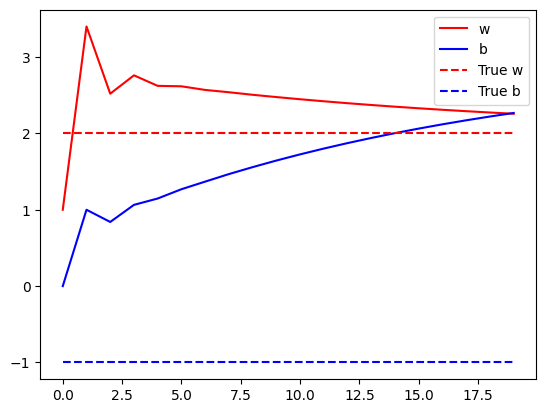

In [5]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()